In [2]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import pymc3 as pm
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

48

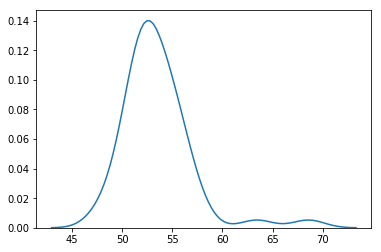

In [29]:
data = np.array([51.06, 55.12, 53.73, 50.24, 52.05, 56.40, 48.45,
52.34, 55.65, 51.49, 51.86, 63.43, 53.00, 56.09, 51.93, 52.31, 52.33,
57.48, 57.44, 55.14, 53.93, 54.62, 56.09, 68.58, 51.36, 55.47, 50.73,
51.94, 54.95, 50.39, 52.91, 51.5, 52.68, 47.72, 49.73, 51.82, 54.99,
52.84, 53.19, 54.52, 51.46, 53.73, 51.61, 49.81, 52.42, 54.3, 53.84,
53.16])
sns.kdeplot(data)
len(data)

(array([0.02996165, 0.02996165, 0.02996165, 0.08988495, 0.0599233 ,
        0.20973154, 0.20973154, 0.17976989, 0.1198466 , 0.08988495,
        0.1198466 , 0.0599233 , 0.08988495, 0.02996165, 0.02996165,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.02996165, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.02996165]),
 array([47.72      , 48.41533333, 49.11066667, 49.806     , 50.50133333,
        51.19666667, 51.892     , 52.58733333, 53.28266667, 53.978     ,
        54.67333333, 55.36866667, 56.064     , 56.75933333, 57.45466667,
        58.15      , 58.84533333, 59.54066667, 60.236     , 60.93133333,
        61.62666667, 62.322     , 63.01733333, 63.71266667, 64.408     ,
        65.10333333, 65.79866667, 66.494     , 67.18933333, 67.88466667,
        68.58      ]),
 <a list of 30 Patch objects>)

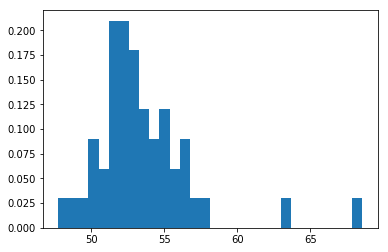

In [6]:
plt.hist(data,30,density=1)

In [7]:
with pm.Model() as model_g:
    mu = pm.Uniform('mu', 40, 75)
    sigma = pm.HalfNormal('sigma', sd=10)
    y = pm.Normal('y', mu=mu, sd=sigma, observed=data)
    trace_g = pm.sample(1100)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, mu]
Sampling 2 chains: 100%|██████████| 3200/3200 [00:01<00:00, 2122.52draws/s]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3b62aa94e0>,
      dtype=object)

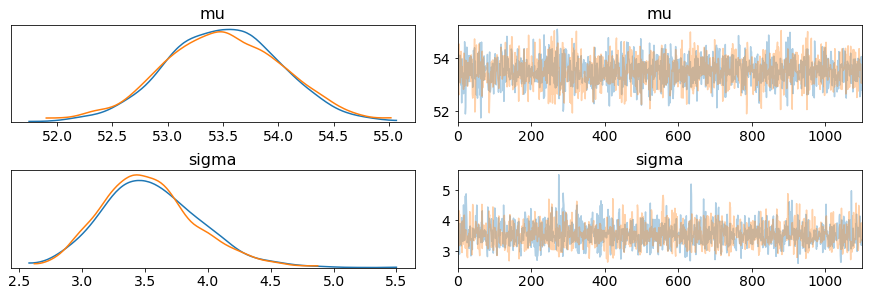

In [10]:
pm.traceplot(trace_g)

In [11]:
pm.summary(trace_g)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
mu,53.491388,0.528594,0.010411,52.521589,54.604219,2365.992061,0.999570
sigma,3.541131,0.382729,0.008085,2.833814,4.291755,1969.716383,1.000831


100%|██████████| 200/200 [00:00<00:00, 1067.88it/s]


Text(0.5, 0, '$x$')

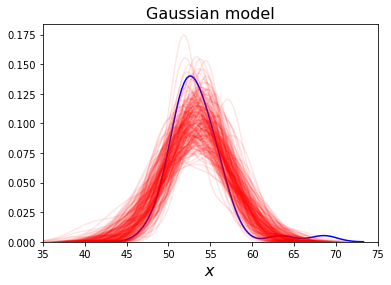

In [45]:
y_pred = pm.sample_posterior_predictive(trace_g, 200, model_g, size=1)
sns.kdeplot(data, color='b')
for i in y_pred['y']:
    sns.kdeplot(i, color='r', alpha=0.1)
plt.xlim(35, 75)
plt.title('Gaussian model', fontsize=16)
plt.xlabel('$x$', fontsize=16)

In [64]:
np.mean(stats.t(loc=0, scale=1, df=1).rvs(10000))

1.7757732164225617

In [77]:
np.mean(stats.norm(loc=0, scale=1).rvs(10000))

0.01097121034406965

(-7, 7)

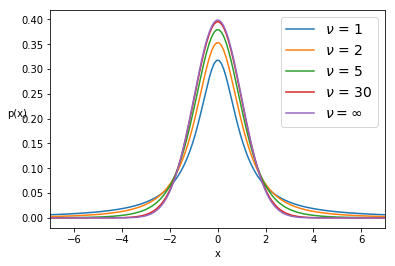

In [78]:
x_values = np.linspace(-10, 10, 200)
for df in [1, 2, 5, 30]:
    distri = stats.t(df)
    x_pdf = distri.pdf(x_values)
    plt.plot(x_values, x_pdf, label=r'$\nu$ = {}'.format(df))
x_pdf = stats.norm.pdf(x_values)
plt.plot(x_values, x_pdf, label=r'$\nu = \infty$')
plt.xlabel('x')
plt.ylabel('p(x)', rotation=0)
plt.legend(loc=0, fontsize=14)
plt.xlim(-7, 7)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [nu, sigma, mu]
Sampling 2 chains: 100%|██████████| 3000/3000 [00:02<00:00, 1387.34draws/s]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3b54c31cc0>,
      dtype=object)

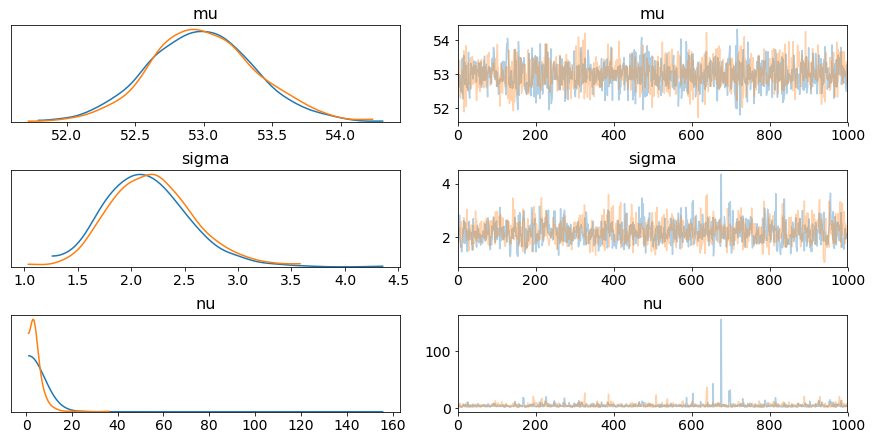

In [81]:
with pm.Model() as model_t:
    mu = pm.Uniform('mu', 40, 75)
    sigma = pm.HalfNormal('sigma', sd=10)
    nu = pm.Exponential('nu', 1/30)
    y = pm.StudentT('y', mu=mu, sd=sigma, nu=nu, observed=data)
    trace_t = pm.sample(1000)
pm.traceplot(trace_t)


In [82]:
pm.summary(trace_t)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
mu,52.991297,0.380637,0.009349,52.272690,53.777968,1502.156069,1.000633
sigma,2.179920,0.394277,0.012182,1.440264,2.974143,1018.212058,1.003477
nu,4.586345,4.662930,0.133600,1.250853,9.822653,1173.640431,1.000006


In [3]:
N_samples = [30, 30, 30]
G_samples = [18, 18, 18]
group_idx = np.repeat(np.arange(len(N_samples)), N_samples)
data = []
for i in range(0, len(N_samples)):
    data.extend(np.repeat([1, 0], [G_samples[i], N_samples[i]- G_samples[i]]))

In [4]:
group_idx

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [32]:
len(data)

90

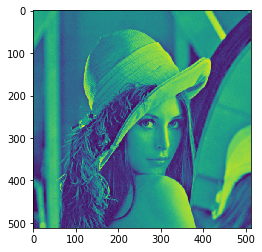

In [2]:
import scipy.misc
import matplotlib.pyplot as plt
lena=scipy.misc.face()
plt.imshow(lena)
def lena():
    import pickle
    import numpy as np
    f = open('./lena.dat','rb')
    lena = np.array(pickle.load(f))
    f.close()
    return lena
plt.imshow(lena())

Text(0.5, 0, '$y$')

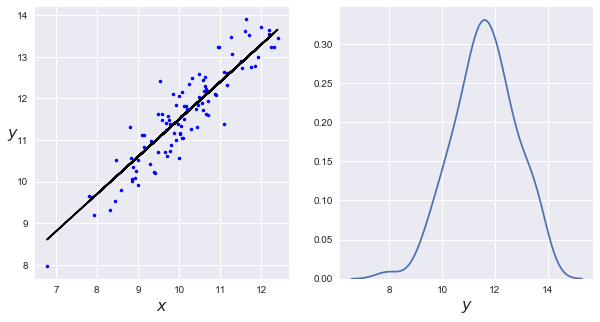

In [3]:
import numpy as np
import pymc3 as pm
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

np.random.seed(314)
N = 100
alfa_real = 2.5
beta_real = 0.9
eps_real = np.random.normal(0, 0.5, size=N)
x = np.random.normal(10, 1, N)
y_real = alfa_real + beta_real * x
y = y_real + eps_real
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(x, y, 'b.')
plt.xlabel('$x$', fontsize=16)
plt.ylabel('$y$', fontsize=16, rotation=0)
plt.plot(x, y_real, 'k')
plt.subplot(1,2,2)
sns.kdeplot(y)
plt.xlabel('$y$', fontsize=16)

In [4]:
with pm.Model() as model:
    alpha = pm.Normal('alpha', mu=0, sd=10)
    beta = pm.Normal('beta', mu=0, sd=1)
    epsilon = pm.HalfCauchy('epsilon', 5)
    y_pred = pm.Normal('y_pred', mu= alpha + beta * x, sd=epsilon, observed=y)
    trace = pm.sample(10000,tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [epsilon, beta, alpha]
Sampling 2 chains: 100%|██████████| 22000/22000 [00:53<00:00, 410.40draws/s]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff287832f98>,
      dtype=object)

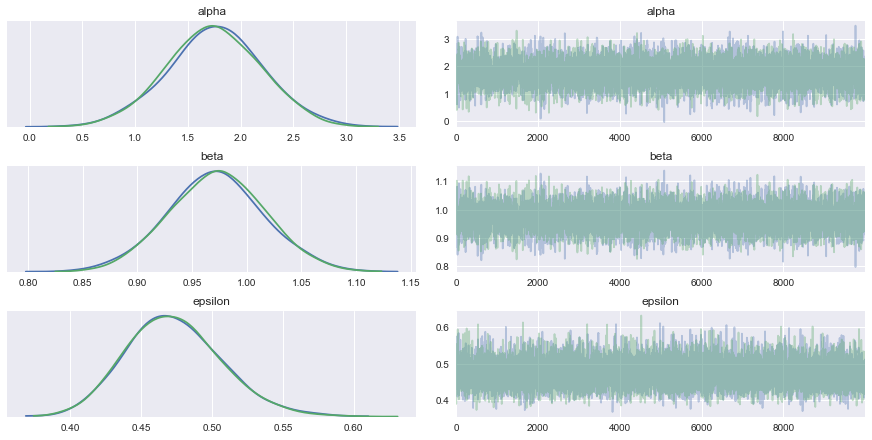

In [6]:
pm.traceplot(trace)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff28c4b6f28>,
      dtype=object)

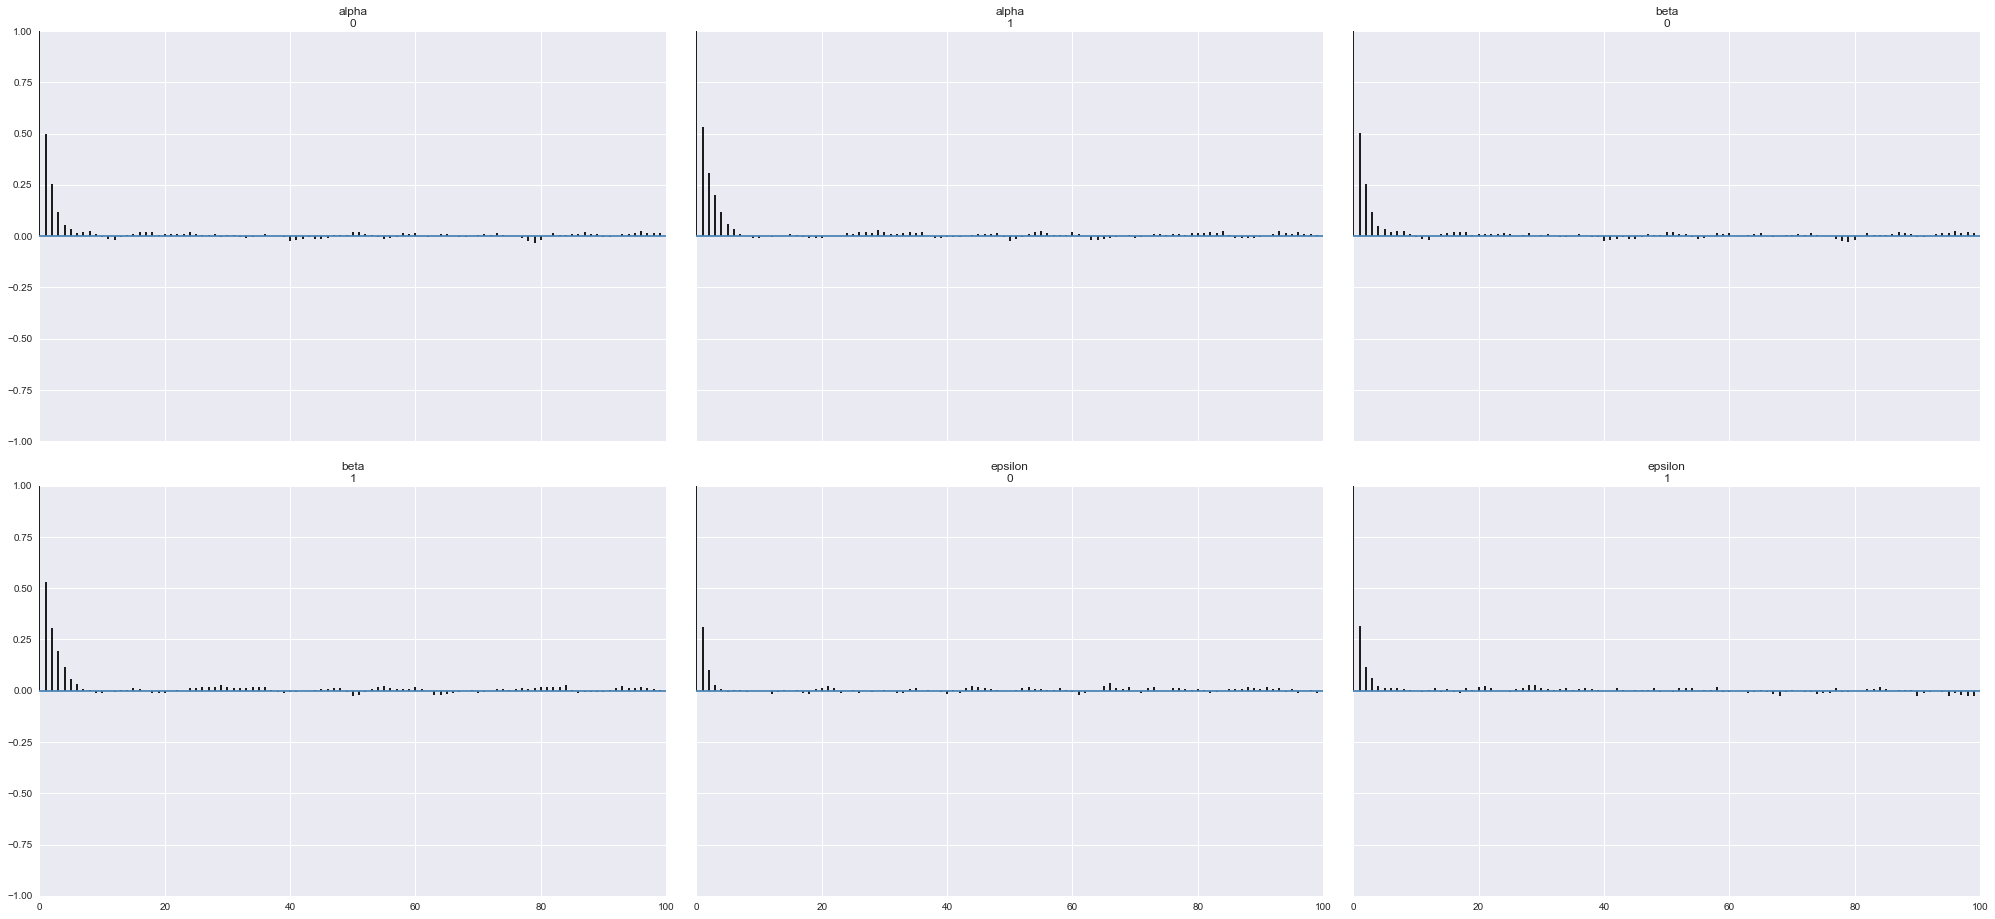

In [7]:
pm.autocorrplot(trace)

Text(0, 0.5, '$\\beta$')

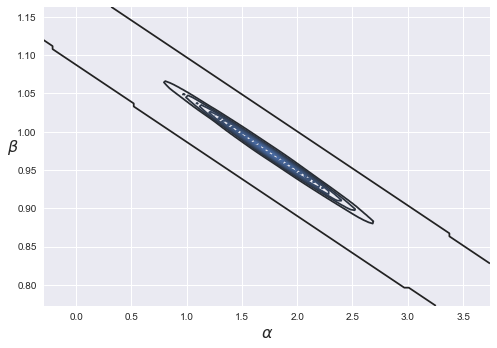

In [9]:
sns.kdeplot(trace['alpha'], trace['beta'])
plt.xlabel(r'$\alpha$', fontsize=16)
plt.ylabel(r'$\beta$', fontsize=16, rotation=0)

Text(0, 0.5, '$\\epsilon$')

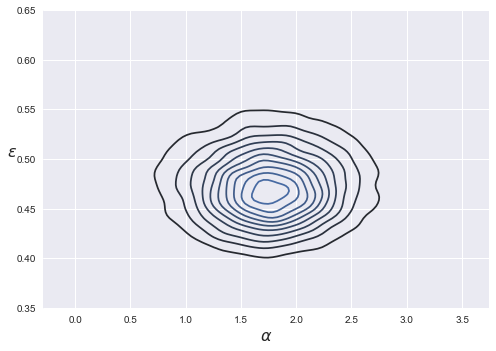

In [11]:
sns.kdeplot(trace['alpha'], trace['epsilon'])
plt.xlabel(r'$\alpha$', fontsize=16)
plt.ylabel(r'$\epsilon$', fontsize=16, rotation=0)

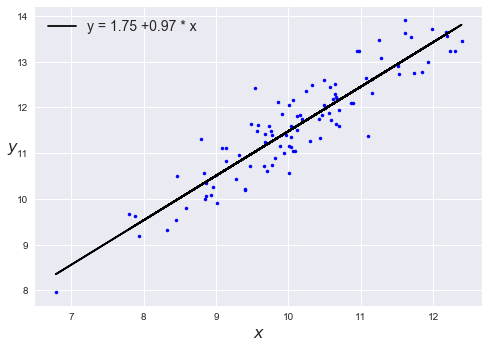

In [12]:
plt.plot(x, y, 'b.');
alpha_m = trace['alpha'].mean()
beta_m = trace['beta'].mean()
plt.plot(x, alpha_m + beta_m * x, c='k', label='y = {:.2f} +{:.2f} * x'.format(alpha_m, beta_m))
plt.xlabel('$x$', fontsize=16)
plt.ylabel('$y$', fontsize=16, rotation=0)
plt.legend(loc=2, fontsize=14)

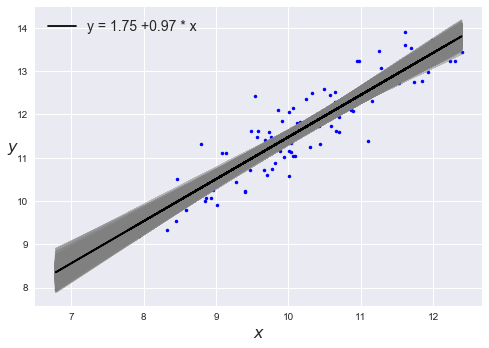

In [13]:
plt.plot(x, y, 'b.');
idx = range(0, len(trace['alpha']), 10)
plt.plot(x, trace['alpha'][idx] + trace['beta'][idx] *
x[:,np.newaxis], c='gray', alpha=0.5);
plt.plot(x, alpha_m + beta_m * x, c='k', label='y = {:.2f} +{:.2f} * x'.format(alpha_m, beta_m))
plt.xlabel('$x$', fontsize=16)
plt.ylabel('$y$', fontsize=16, rotation=0)
plt.legend(loc=2, fontsize=14)

100%|██████████| 10000/10000 [00:11<00:00, 849.20it/s]


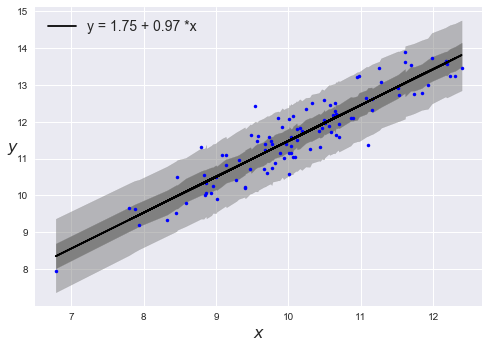

In [14]:
ppc = pm.sample_posterior_predictive(trace, samples=10000, model=model)
plt.plot(x, y, 'b.')
plt.plot(x, alpha_m + beta_m * x, c='k', label='y = {:.2f} + {:.2f} *x'.format(alpha_m, beta_m))
idx = np.argsort(x)
x_ord = x[idx]
sig0 = pm.hpd(ppc['y_pred'], alpha=0.5)[idx]
sig1 = pm.hpd(ppc['y_pred'], alpha=0.05)[idx]
plt.fill_between(x_ord, sig0[:,0], sig0[:,1], color='gray', alpha=1)
plt.fill_between(x_ord, sig1[:,0], sig1[:,1], color='gray', alpha=0.5)
plt.xlabel('$x$', fontsize=16)
plt.ylabel('$y$', fontsize=16, rotation=0)
plt.legend(loc=2, fontsize=14)

Text(0.5, 0, '$y$')

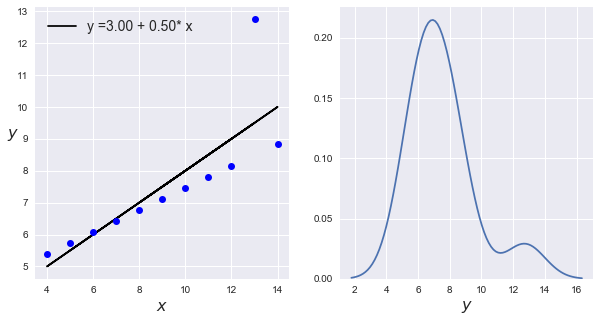

In [15]:
# Robust linear regression

# https://en.wikipedia.org/wiki/Anscombe%27s_quartet
ans = sns.load_dataset('anscombe')
x_3 = ans[ans.dataset == 'III']['x'].values
y_3 = ans[ans.dataset == 'III']['y'].values
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
beta_c, alpha_c = stats.linregress(x_3, y_3)[:2]
plt.plot(x_3, (alpha_c + beta_c* x_3), 'k', label='y ={:.2f} + {:.2f}* x'.format(alpha_c, beta_c))
plt.plot(x_3, y_3, 'bo')
plt.xlabel('$x$', fontsize=16)
plt.ylabel('$y$', rotation=0, fontsize=16)
plt.legend(loc=0, fontsize=14)
plt.subplot(1,2,2)
sns.kdeplot(y_3);
plt.xlabel('$y$', fontsize=16)

In [16]:
with pm.Model() as model_t:
    alpha = pm.Normal('alpha', mu=0, sd=100)
    beta = pm.Normal('beta', mu=0, sd=1)
    epsilon = pm.HalfCauchy('epsilon', 5)
    #nu = pm.Deterministic('nu', pm.Exponential('nu_', 1/29) + 1)
    y_pred = pm.StudentT('y_pred', mu=alpha + beta * x_3, sd=epsilon, 
                         nu=pm.Exponential('nu_', 1/29) + 1, observed=y_3)
    trace_t = pm.sample(10000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [nu_, epsilon, beta, alpha]
Sampling 2 chains: 100%|██████████| 21000/21000 [00:54<00:00, 385.90draws/s]
The number of effective samples is smaller than 25% for some parameters.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff275161c18>,
      dtype=object)

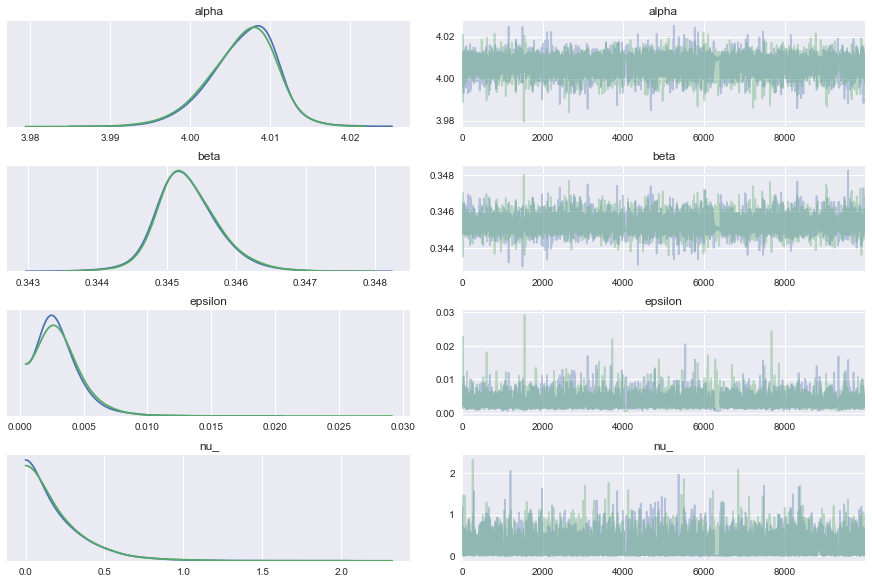

In [17]:
pm.traceplot(trace_t)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff274e1b6a0>,
      dtype=object)

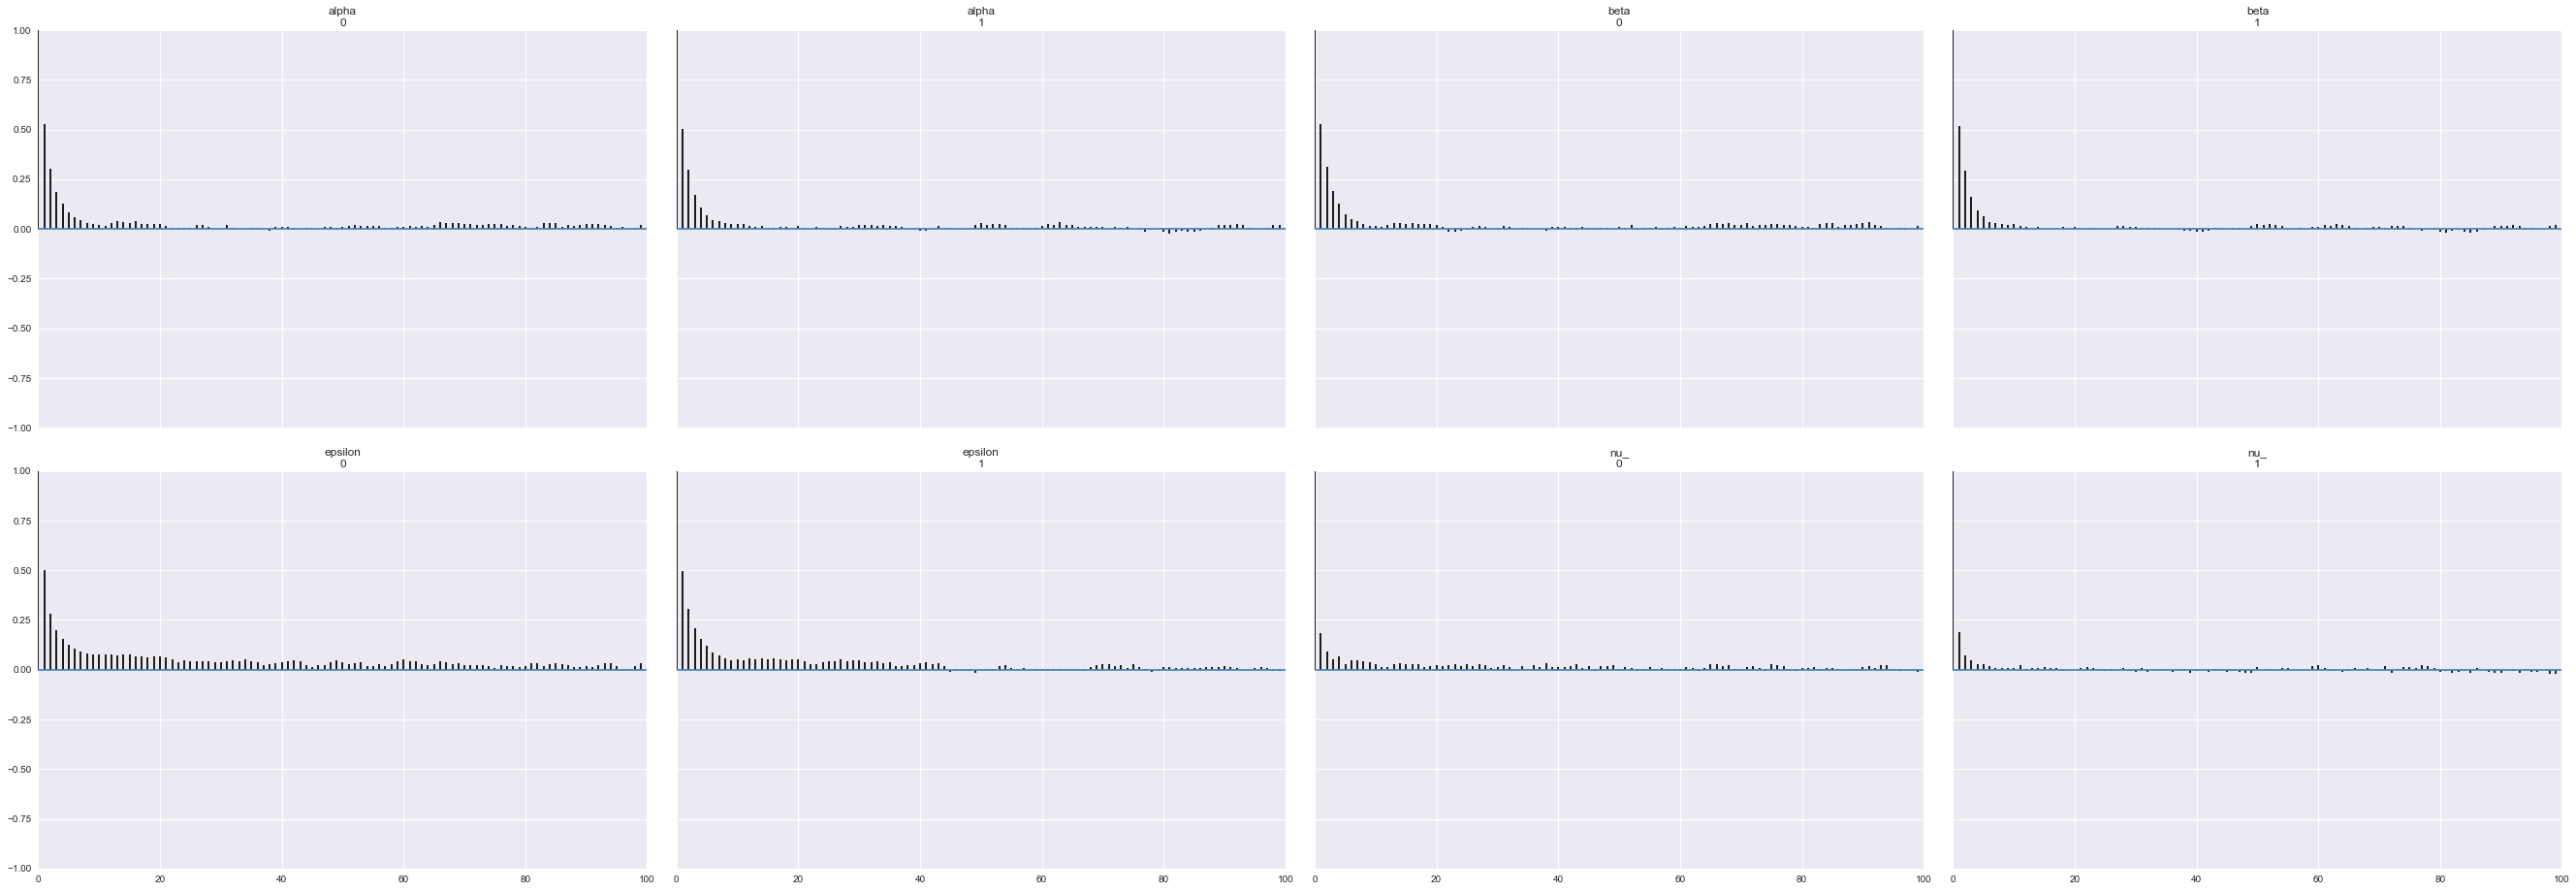

In [18]:
pm.autocorrplot(trace_t)

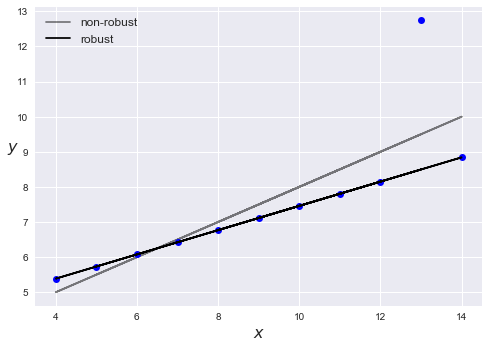

In [19]:
beta_c, alpha_c = stats.linregress(x_3, y_3)[:2]
plt.plot(x_3, (alpha_c + beta_c * x_3), 'k', label='non-robust',alpha=0.5)
plt.plot(x_3, y_3, 'bo')
alpha_m = trace_t['alpha'].mean()
beta_m = trace_t['beta'].mean()
plt.plot(x_3, alpha_m + beta_m * x_3, c='k', label='robust')
plt.xlabel('$x$', fontsize=16)
plt.ylabel('$y$', rotation=0, fontsize=16)
plt.legend(loc=2, fontsize=12)

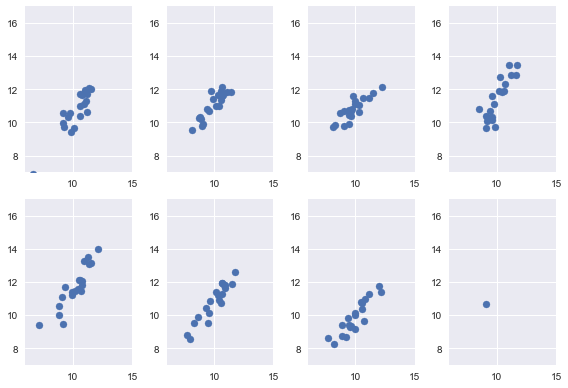

In [20]:
# Hierarchical linear regression

N = 20
M = 8
idx = np.repeat(range(M-1), N)
idx = np.append(idx, 7)
alpha_real = np.random.normal(2.5, 0.5, size=M)
beta_real = np.random.beta(60, 10, size=M)
eps_real = np.random.normal(0, 0.5, size=len(idx))
y_m = np.zeros(len(idx))
x_m = np.random.normal(10, 1, len(idx))
y_m = alpha_real[idx] + beta_real[idx] * x_m + eps_real
j, k = 0, N
for i in range(M):
    plt.subplot(2,4,i+1)
    plt.scatter(x_m[j:k], y_m[j:k])
    plt.xlim(6, 15)
    plt.ylim(7, 17)
    j += N
    k += N
plt.tight_layout()

In [21]:
x_centered = x_m - x_m.mean()
with pm.Model() as unpooled_model:
    alpha_tmp = pm.Normal('alpha_tmp', mu=0, sd=10, shape=M)
    beta = pm.Normal('beta', mu=0, sd=10, shape=M)
    epsilon = pm.HalfCauchy('epsilon', 5)
    nu = pm.Exponential('nu', 1/30)
    y_pred = pm.StudentT('y_pred', mu=alpha_tmp[idx] + beta[idx] * x_centered, sd=epsilon, nu=nu, observed=y_m)
    alpha = pm.Deterministic('alpha', alpha_tmp - beta * x_m.mean())
    trace_up = pm.sample(10000)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [nu, epsilon, beta, alpha_tmp]
Sampling 2 chains: 100%|██████████| 21000/21000 [01:53<00:00, 184.84draws/s]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff272769978>,
      dtype=object)

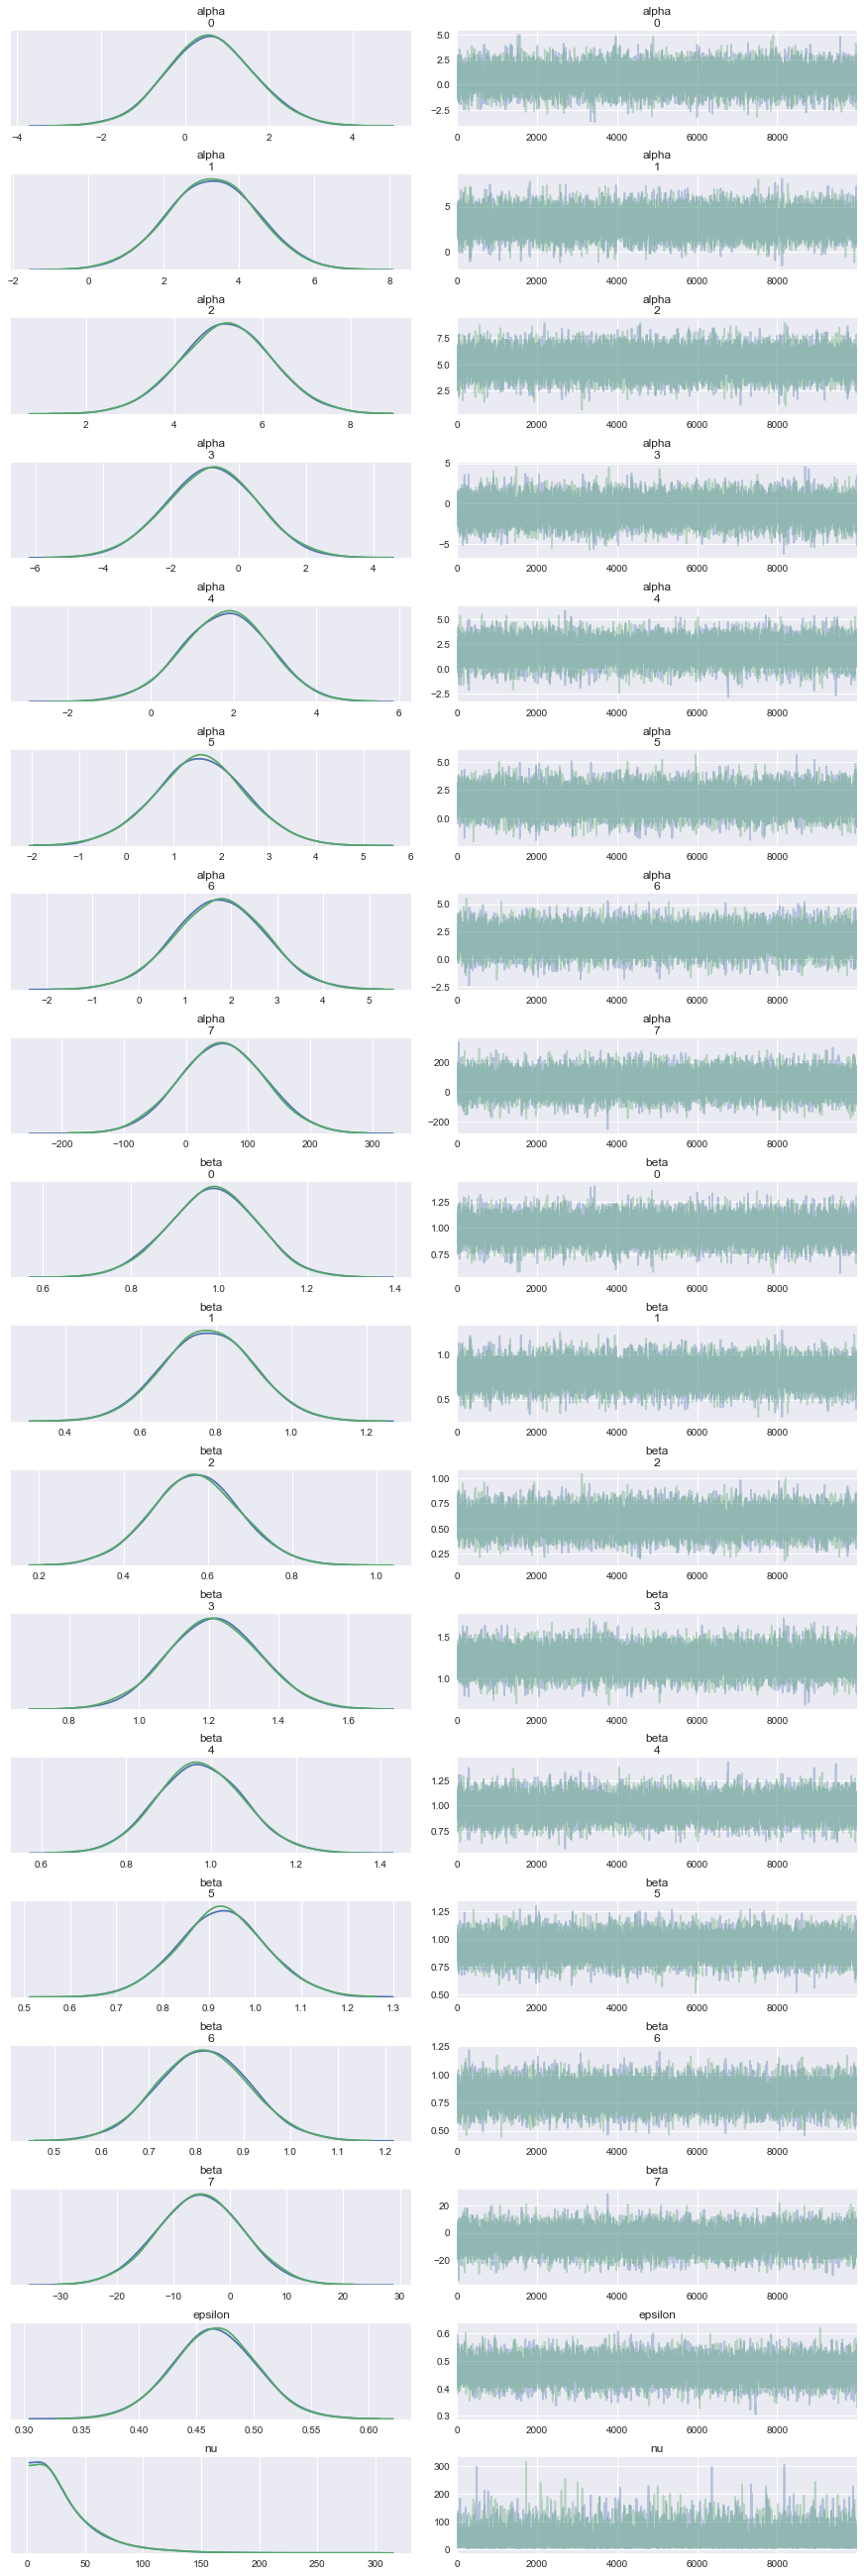

In [22]:
varnames = ['alpha', 'beta', 'epsilon', 'nu']
pm.traceplot(trace_up, varnames)

In [ ]:
# http://www.tylervigen.com/spurious-correlations
# see the book: spurious correlations 2015